<a href="https://colab.research.google.com/github/eshagr/Walmart_Store_Sales/blob/main/Wal_Features_Stores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis of Walmart Retail Sales**

**Exploratory data analysis of Walmart's Sales in the U.S. from January 2010 to October 2012. **


1.  Input variables: Store, Size, Type, Holiday_Flag, Date, Temperature, CPI, Unemployment, Fuel_Price
2.  Output variable: Weekly_Sales



Import libraries 

In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Mount Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Load csv files: Store_Sales and Stores_details 

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Data/Walmart/Walmart_Store_sales.csv"
df_store_sales = pd.read_csv(path)
path2 = "/content/drive/MyDrive/Colab Notebooks/Data/Walmart/stores.csv"
df_stores = pd.read_csv(path2)


Check data types in both files 

In [ ]:
df_stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [ ]:
df_store_sales.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

**Observations:** 
Date column is string(object) and needs dtype conversion

In [ ]:
df_store_sales['Date']= df_store_sales['Date'].astype('datetime64[ns]')


**Merge both csv files using INNER JOIN**
> Create one dataframe: data



In [ ]:
# Merging two datasets 
data = pd.merge(df_store_sales,df_stores,on=['Store'], how="inner")


In [ ]:
data.info().to_frame()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Type          6435 non-null   object        
 9   Size          6435 non-null   int64         
 10  Year          6435 non-null   int64         
 11  Month         6435 non-null   int64         
 12  Week          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory usage: 703.8+ KB


AttributeError: ignored

**How dataframe looks like?**

In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,A,151315
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,A,151315
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,A,151315
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,A,151315
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,A,151315


**Rows and columns count**


> Rows: 6435 and Columns: 14



In [ ]:
data.shape

(6435, 10)

***Brief stats summary of dataframe ***

In [ ]:
data.describe().to_dataframe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,130287.600000,2010.965035,6.447552,25.818182
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,63117.022465,0.797019,3.238308,14.129201
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,34875.000000,2010.000000,1.000000,1.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,70713.000000,2010.000000,4.000000,14.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,126512.000000,2011.000000,6.000000,26.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,202307.000000,2012.000000,9.000000,38.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,219622.000000,2012.000000,12.000000,52.000000


**Any missing or null values?**

In [ ]:
# Null values in dataset 
data.isnull().sum()
# Drop null rows from data

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

**To save merged data as a csv in the drive**

In [ ]:
# path4 = '/content/drive/MyDrive/Colab Notebooks/Data/Walmart.csv'

# with open(path4, 'w', encoding = 'utf-8-sig') as f:
#   data.to_csv(f)

***Adding a few columns ***

In [ ]:
# Feature Engineering 
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Week'] = pd.DatetimeIndex(data['Date']).week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


**Snapshot of dataframe after adding new columns**

In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,A,151315,2010,2,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,A,151315,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,A,151315,2010,2,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,A,151315,2010,3,9


## **Analysis**

# **Total number of stores and their types**

> Insight:
There are 45 stores in total.
They are of three types A, B and C



In [ ]:
store_count = len(pd.unique(data['Store']))
store_count

45

# **Store Type**

> Insight: Type 'A' is the most popular one.
Percentage of each store_type-



In [ ]:
store_type_per = data['Type'].value_counts(normalize=True)*100
store_type_per

A    48.888889
B    37.777778
C    13.333333
Name: Type, dtype: float64

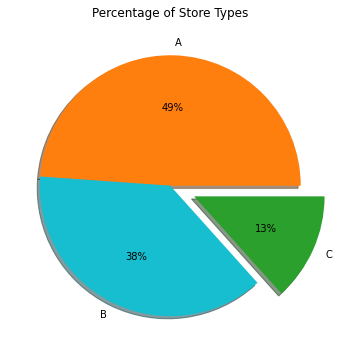

In [ ]:
# Creating pie chart for store type
x=[48.8, 37.7,13.33]
labels= ['A','B','C']
colors = ['tab:orange', 'tab:cyan', 'tab:green']
explode = [0, 0, 0.2]
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.pie(x, labels = labels, 
          colors = colors, 
          autopct='%.0f%%', 
          explode = explode, 
          shadow = True)
          
ax.set_title('Percentage of Store Types')
plt.show()

#Store with maximum weekly_sales 
> Insight: Store 20 has the highest weekly_sales combined



In [ ]:
# The store that has maxiumu sales 
max_sales = data.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False)
max_sales.head(10)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
Name: Weekly_Sales, dtype: float64

# **# Store vs Avg Weekly_Sales**
> Insights 

> 2010: store 14 has the highest avg weekly_sales

> 2011 and 2012: store 4 has the avg highest weekly_sales









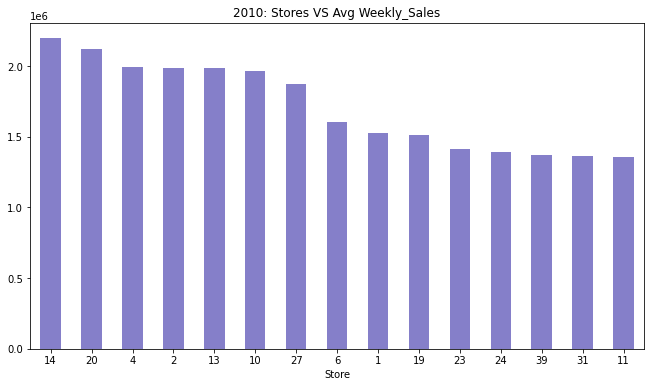

In [ ]:
Avg_Sales_2010= data[data['Year']==2010].groupby('Store')['Weekly_Sales'].mean().sort_values(ascending= False).head(15)
plt.figure(figsize=(11,6))
Avg_Sales_2010.plot.bar(title ='2010: Stores VS Avg Weekly_Sales', color= '#857fc9' )
plt.xticks(rotation=0)
plt.show()

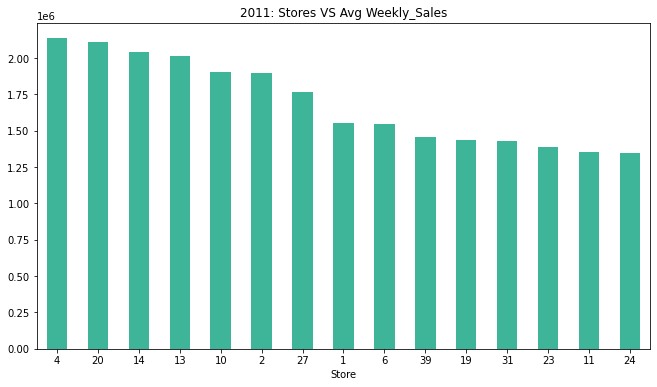

In [ ]:
Avg_Sales_2011= data[data['Year']==2011].groupby('Store')['Weekly_Sales'].mean().sort_values(ascending= False).head(15)
plt.figure(figsize=(11,6))
Avg_Sales_2011.plot.bar(title ='2011: Stores VS Avg Weekly_Sales', color= '#3eb599' )
plt.xticks(rotation=0)
plt.show()

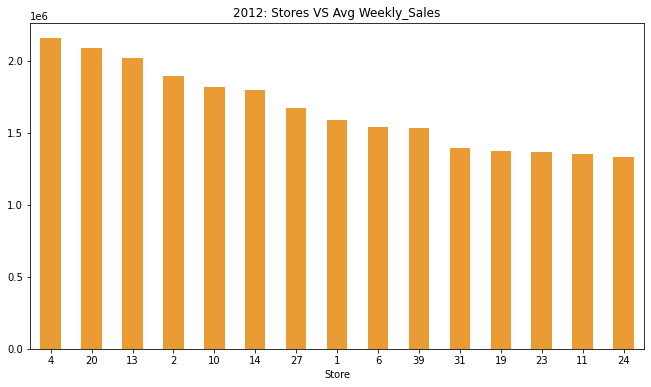

In [ ]:
Avg_Sales_2012= data[data['Year']==2012].groupby('Store')['Weekly_Sales'].mean().sort_values(ascending= False).head(15)
plt.figure(figsize=(11,6))
Avg_Sales_2012.plot.bar(title ='2012: Stores VS Avg Weekly_Sales', color= '#eb9b34' )
plt.xticks(rotation=0)
plt.show()

In [ ]:
store_max_sales = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head()
store_max_sales

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

# **Standard deviation**
Store with maximum variations in weekly_sales
> Insight- Store 14 has max std deviation in weekly_sales



In [ ]:
weekly_sales_list = []
total_stores = data['Store'].nunique()
# Number of stores start from one
start =1 
# Range goes till N-1, thus 
end = total_stores + 1 


for store in range(start, end):
  temp = data[data['Store']==store]
  value = temp['Weekly_Sales'].values 
#  converting the array into dataframe and calculating standard deviation values 
  temp1 = np.std(value)
# adding the std dev values to a list 
  weekly_sales_list.append(temp1)

#Find the maximum value of std deviation 
max_std_dev = max(weekly_sales_list)
max_std_dev

# Find the index value of the store with highes std deviation value 
store_max_dev = weekly_sales_list.index(max_std_dev)+1
store_max_dev

14

## **Weekly_Sales during holidays!**
> Store 20 has the maximum sales during holidays



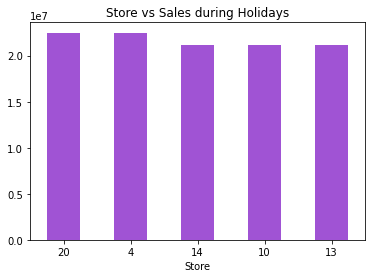

In [ ]:
store_holidays_sales = data[data['Holiday_Flag']==1].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)
store_holidays_sales.plot.bar(color='#a053d4', title='Store vs Sales during Holidays')
plt.xticks(rotation=0)
plt.show()

# **Sales: Yearly| Monthly**

Dataframe has data of three years 
> 2010,2011 and 2012



In [ ]:
data['Year'].unique()

array([2010, 2011, 2012])

# **Year with maximum sales**
> 2011 as the highest total sales 

> The average sales for all three years is almost similar





In [ ]:
#Year with highest average sales
year_max_avg_sales = data.groupby('Year')['Weekly_Sales'].mean().sort_values(ascending=False)
year_max_avg_sales 

Year
2010    1.059670e+06
2011    1.046239e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

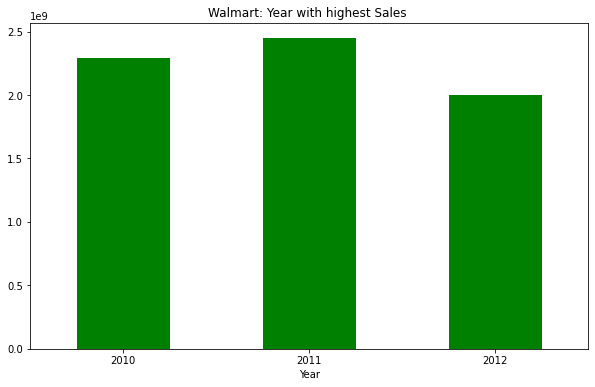

In [ ]:
# Year with highest weekly_sales
plt.figure(figsize=(10,6))
data.groupby('Year')['Weekly_Sales'].sum().plot.bar(x='Year', y='Weekly_Sales', title="Walmart: Year with highest Sales ", color='green')
plt.xticks(rotation=0)
plt.show()


# **Months Vs Avg Weekly_Sales**

> 2010 & 2011: Months 11 and 12 show the highest average weekly sales

> 2012: Month 6 has has highest average weekly sales 





In [ ]:
month_sales_2010=data[data['Year']==2010].groupby('Month')['Weekly_Sales'].mean()
month_sales_2011=data[data['Year']==2011].groupby('Month')['Weekly_Sales'].mean()
month_sales_2012=data[data['Year']==2012].groupby('Month')['Weekly_Sales'].mean()


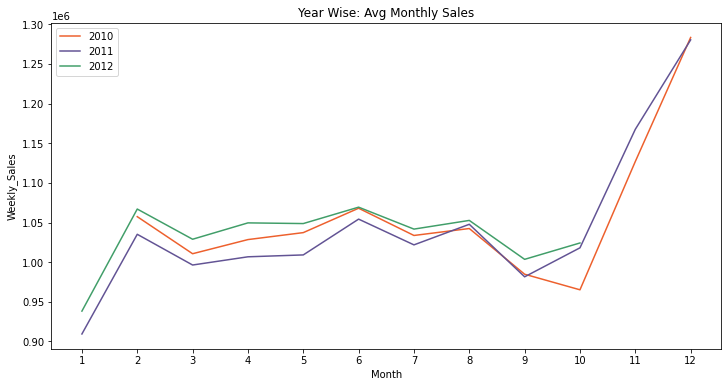

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(month_sales_2010.index,month_sales_2010.values,'#ed602d')
plt.plot(month_sales_2011.index,month_sales_2011.values,'#625394')
plt.plot(month_sales_2012.index,month_sales_2012.values,'#419e69')
start =1
end = 12
plt.xticks([i for i in range(start, end+1 ,1)])

#plt.xticks(np.arange(1,13,1))
plt.xlabel('Month')
plt.ylabel('Weekly_Sales')
plt.legend(['2010','2011','2012'])
plt.title("Year Wise: Avg Monthly Sales")
plt.show()


# **Correlation Matrix!**
> Insights from the heatmap

> There is strong correlation between Weekly_Sales and Size of the store, bigger store size can accomodate more people and leads to higher weekly_sales


> Correlation between Fuel_price and Year. Fuel_prices are volatile and vary every year. 
The output variable - Weekly_Sales is only strongly related to the Size


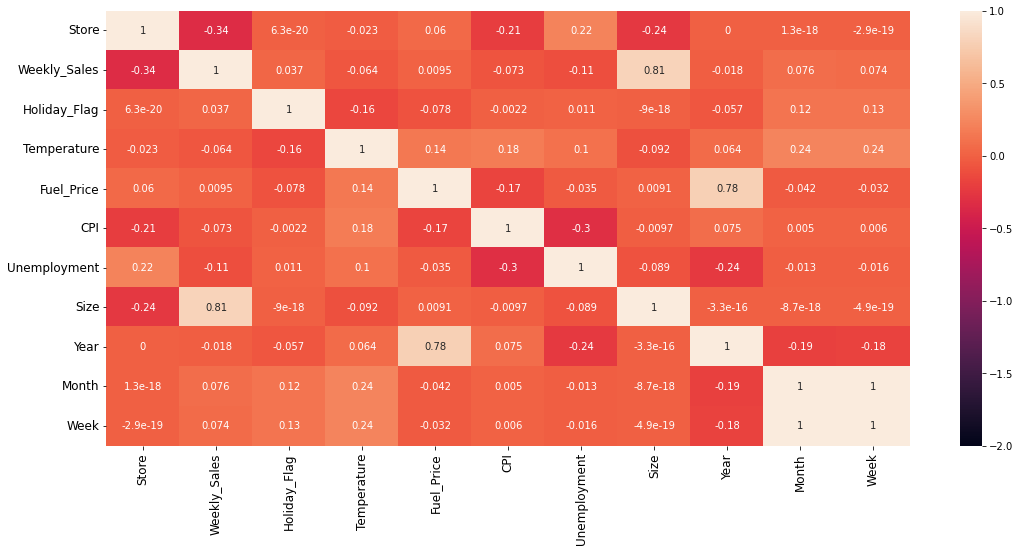

In [ ]:
corr = data.corr()
plt.figure(figsize=(18,8))
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)

sns.heatmap(corr, annot=True, vmin=-2.0, cmap='rocket')
plt.show()

**Correlation b/w Weekly_Sales and Store Size**
> Insight: 
> There is a linear relation between the two 
The value is .81 indicates fairly strong relation between the two.





In [113]:
corr_weeklysales_size = data['Weekly_Sales'].corr(data['Size'])
corr_weeklysales_size

0.8104684946513715

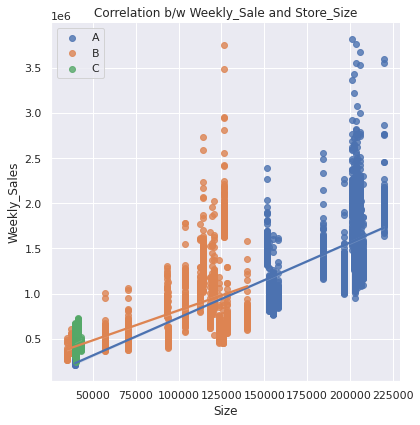

In [110]:
g = sns.FacetGrid(data, hue='Type', size = 6)
g = g.map(sns.regplot, "Size", "Weekly_Sales")
plt.title('Correlation b/w Weekly_Sale and Store_Size')
plt.legend()
plt.show()

**Correlation b/w Weekly_Sales and Fuel_Price**
> Insight: 
> There is a no relation between the two 
The value is .01 indicates extremely weak or no relation between the two.





In [114]:
corr_weeklysales_fuelp = data['Weekly_Sales'].corr(data['Fuel_Price'])
corr_weeklysales_fuelp

0.00946378631447511

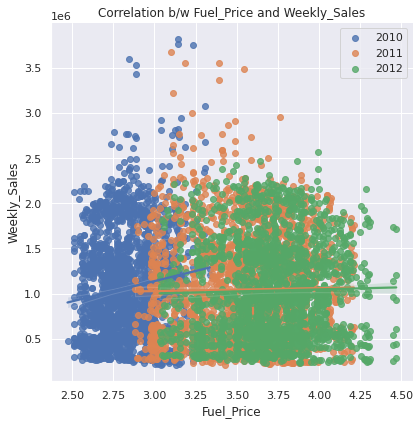

In [111]:
g = sns.FacetGrid(data, hue='Year', size = 6)
g = g.map(sns.regplot, "Fuel_Price", "Weekly_Sales")
plt.title('Correlation b/w Fuel_Price and Weekly_Sales')
plt.legend()
plt.show()

## Executive Summary

> 

1.   As per the data provided Weekly_Sales of Walmart primarily depend on factors like type of store and the size.
2.   There is a common pattern where weekly_sales increase considerably during holidays season - months 11 and 12 (for years 2010 and 2011).Indicates that people shop more during the year end.
3.   Other input variables like CPI, unemployment, fuel_price, temperature has no or extremely low impact on the output variable weekly_sales.














